![bookstore](bookstore.jpg)


Identifying popular products is incredibly important for e-commerce companies! Popular products generate more revenue and, therefore, play a key role in stock control.

You've been asked to support an online bookstore by building a model to predict whether a book will be popular or not. They've supplied you with an extensive dataset containing information about all books they've sold, including:

* `price`
* `popularity` (target variable)
* `review/summary`
* `review/text`
* `review/helpfulness`
* `authors`
* `categories`

You'll need to build a model that predicts whether a book will be rated as popular or not.

They have high expectations of you, so have set a target of at least 70% accuracy! You are free to use as many features as you like, and will need to engineer new features to achieve this level of performance.

In [11]:
# Import some required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.width", 1000)

Help the online bookstore identify their bestsellers.

- Create a binary classification model to predict whether a book is rated as `"Popular"` or `"Unpopular"`, achieving an accuracy score of over 70%.
- The final output should be a variable called `model_accuracy` with a value of over 0.7.

In [12]:
books = pd.read_csv("data/books.csv")

print(books.head())

                                               title  price review/helpfulness                                     review/summary                                        review/text                                        description                                    authors             categories popularity
0  We Band of Angels: The Untold Story of America...  10.88                2/3                   A Great Book about women in WWII  I have alway been a fan of fiction books set i...  In the fall of 1941, the Philippines was a gar...                         'Elizabeth Norman'              'History'  Unpopular
1  Prayer That Brings Revival: Interceding for Go...   9.35                0/0  Very helpful book for church prayer groups and...  Very helpful book to give you a better prayer ...  In Prayer That Brings Revival, best-selling au...                              'Yong-gi Cho'             'Religion'  Unpopular
2          The Mystical Journey from Jesus to Christ  24.95              

In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15719 entries, 0 to 15718
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               15719 non-null  object 
 1   price               15719 non-null  float64
 2   review/helpfulness  15719 non-null  object 
 3   review/summary      15718 non-null  object 
 4   review/text         15719 non-null  object 
 5   description         15719 non-null  object 
 6   authors             15719 non-null  object 
 7   categories          15719 non-null  object 
 8   popularity          15719 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


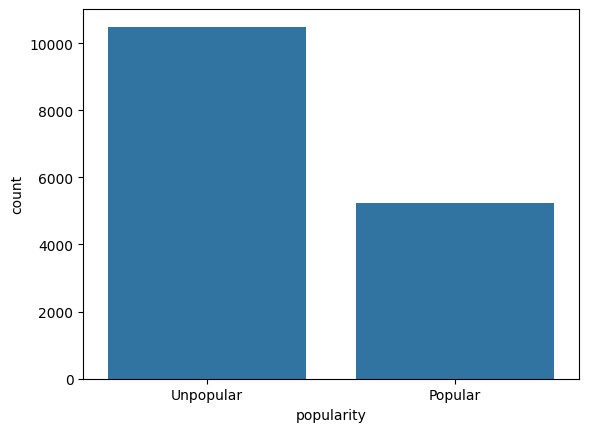

In [14]:
sns.countplot(data=books, x="popularity")
plt.show()

In [15]:
print(books["categories"].value_counts())

categories
'Fiction'                      3520
'Religion'                     1053
'Biography & Autobiography'     852
'Juvenile Fiction'              815
'History'                       754
                               ... 
'Sunflowers'                      1
'Self-confidence'                 1
'United States'                   1
'Note-taking'                     1
'Asthma'                          1
Name: count, Length: 313, dtype: int64


In [16]:
books = books.groupby("categories").filter(lambda x: len(x) > 100)

categories = pd.get_dummies(books["categories"], drop_first=True)

books = pd.concat([books, categories], axis=1)
books.drop(columns=["categories"], inplace=True)

In [17]:
books["num_reviews"] = books["review/helpfulness"].str.split("/", expand=True)[1]
books["num_helpful"] = books["review/helpfulness"].str.split("/", expand=True)[0]

for col in ["num_reviews", "num_helpful"]:
    books[col] = books[col].astype(int)
    
# Add percentage of helpful reviews as a column to normalize the data
books["perc_helpful_reviews"] = books["num_helpful"] / books["num_reviews"]

# Fill null values
books["perc_helpful_reviews"].fillna(0, inplace=True)

# Drop original column
books.drop(columns=["review/helpfulness"], inplace=True)

# Convert strings to lowercase
for col in ["review/summary", "review/text", "description"]:
    books[col] = books[col].str.lower()

In [19]:
print(books.head())

                                               title  price                                     review/summary                                        review/text                                        description                                    authors popularity  'Biography & Autobiography'  'Body, Mind & Spirit'  'Business & Economics'  ...  'Religion'  'Science'  'Self-Help'  'Social Science'  'Sports & Recreation'  'Travel'  'Young Adult Fiction'  num_reviews  num_helpful  perc_helpful_reviews
0  We Band of Angels: The Untold Story of America...  10.88                   a great book about women in wwii  i have alway been a fan of fiction books set i...  in the fall of 1941, the philippines was a gar...                         'Elizabeth Norman'  Unpopular                        False                  False                   False  ...       False      False        False             False                  False     False                  False            3            2           

In [20]:
positive_words = ["great", "excellent", "good", "interesting", "enjoy", "helpful", "useful", "like", "love", "beautiful", "fantastic", "perfect", "wonderful", "impressive", "amazing", "outstanding", "remarkable", "brilliant", "exceptional", "positive",
    "thrilling"]

# Instantiate a CountVectorizer
vectorizer = CountVectorizer(vocabulary=positive_words)

review_text = books["review/text"]
text_transformed = vectorizer.fit_transform(review_text.fillna(''))

review_summary = books["review/summary"]
summary_transformed = vectorizer.fit_transform(review_summary.fillna(''))

description = books["description"]
description_transformed = vectorizer.fit_transform(description.fillna(''))

books["positive_words_text"] = text_transformed.sum(axis=1).reshape(-1, 1)
books["positive_words_summary"] = summary_transformed.sum(axis=1).reshape(-1, 1)
books["positive_words_description"] = description_transformed.sum(axis=1).reshape(-1, 1)

# Remove original columns
books.drop(columns=["review/text", "review/summary", "description"], inplace=True)

In [ ]:
X = books.drop(columns=["title", "authors", "popularity"]).values
y = books["popularity"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
clf = RandomForestClassifier(n_estimators=120, max_depth=50, min_samples_split=5, random_state=42, class_weight="balanced")
clf.fit(X_train, y_train.ravel()) 

# Evaluate accuracy
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

model_accuracy = clf.score(X_test, y_test)

0.9619184849732401
0.7097238895558223
